In [1]:
# Gold Price Forecast #(Forecasting Model)

In [2]:
#1) Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from datetime import datetime
import statsmodels.api as sm

 # Supressing warnings

import warnings             
warnings.filterwarnings('ignore')

In [4]:
#2) Import Dataset

In [5]:
#Load the data
df = pd.read_csv("Gold_data.csv",
                 parse_dates = ['date'],
                )

In [6]:
df

date    price
0    2016-01-01  2252.60
1    2016-01-02  2454.50
2    2016-01-03  2708.10
3    2016-01-04  2577.80
4    2016-01-05  2597.75
...         ...      ...
2177 2021-12-17  4394.40
2178 2021-12-18  4389.50
2179 2021-12-19  4389.50
2180 2021-12-20  4354.10
2181 2021-12-21  4346.50

[2182 rows x 2 columns]

In [7]:
#We have imported the Dataset for Forecasting Model - Gold Price using Pandas.

#This Data Set contains 2182 Rows and 2 Columns

#Date Range - From 01/01/2016 To 21/12/2021. We Have total 5 year data.

In [8]:
#3)EDA (Data Pre-Processing)

In [9]:
df['date'] = pd.to_datetime(df['date'])
df

date    price
0    2016-01-01  2252.60
1    2016-01-02  2454.50
2    2016-01-03  2708.10
3    2016-01-04  2577.80
4    2016-01-05  2597.75
...         ...      ...
2177 2021-12-17  4394.40
2178 2021-12-18  4389.50
2179 2021-12-19  4389.50
2180 2021-12-20  4354.10
2181 2021-12-21  4346.50

[2182 rows x 2 columns]

In [10]:
#Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [11]:
df.shape

(2182, 2)

In [12]:
# Describe the data - Descriptive statistics.
df.describe()

price
count  2182.000000
mean   3284.450046
std     719.564434
min    2252.600000
25%    2697.020000
50%    2879.800000
75%    4147.325000
max    4966.300000

In [13]:
df.median()

price    2879.8
dtype: float64

In [14]:
df.mode()

date   price
0    2016-01-01  2598.7
1    2016-01-02  2892.7
2    2016-01-03     NaN
3    2016-01-04     NaN
4    2016-01-05     NaN
...         ...     ...
2177 2021-12-17     NaN
2178 2021-12-18     NaN
2179 2021-12-19     NaN
2180 2021-12-20     NaN
2181 2021-12-21     NaN

[2182 rows x 2 columns]

In [15]:
# Finding Duplicated values / Null Values 

In [16]:
# Null values

df.isnull().sum()

date     0
price    0
dtype: int64

In [17]:
# Duplicate Values

df.duplicated().sum()

0

In [18]:
#It shows there is no Null and Duplicated values in the dataset

In [19]:
# Know the datatypes
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [20]:
# Unique Values in the data
df['date'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', ...,
       '2021-12-19T00:00:00.000000000', '2021-12-20T00:00:00.000000000',
       '2021-12-21T00:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
df['price'].unique()

array([2252.6, 2454.5, 2708.1, ..., 4389.5, 4354.1, 4346.5])

In [22]:
# Correlation 
df.corr()

price
price    1.0

In [23]:
#Visualization of Data



In [24]:
#Line Plot
df_eda = df.copy()
df_eda.set_index('date', inplace=True)

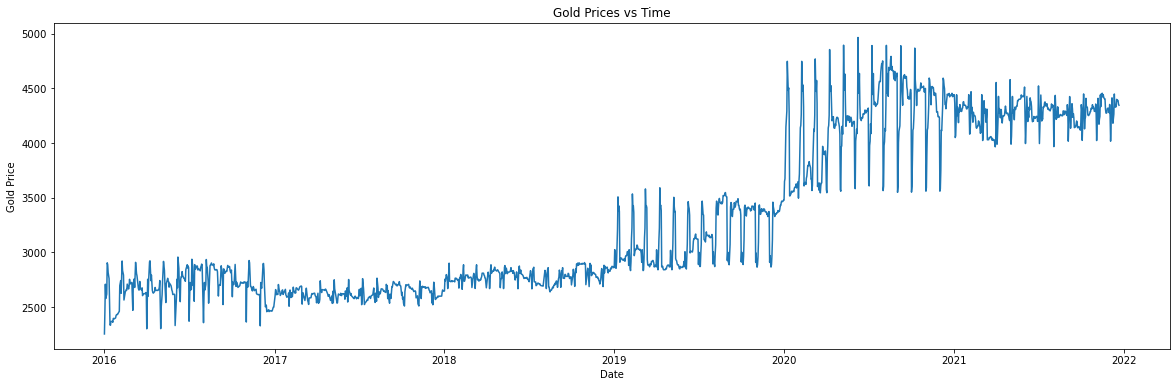

In [25]:
# line plot
plt.figure(figsize=(20, 6))
sns.lineplot(y='price', x='date', data=df);
plt.title('Gold Prices vs Time');
plt.xlabel('Date');
plt.ylabel('Gold Price');

(array([ 65., 780., 422.,  49., 187.,  35., 104., 378., 146.,  16.]),
 array([2252.6 , 2523.97, 2795.34, 3066.71, 3338.08, 3609.45, 3880.82,
        4152.19, 4423.56, 4694.93, 4966.3 ]),
 <BarContainer object of 10 artists>)

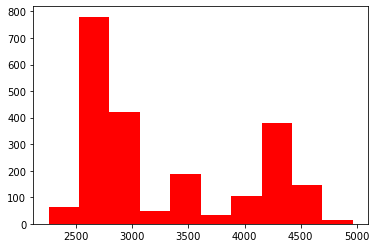

In [26]:
#Histogram
plt.hist(df['price'],color='red')

In [27]:
#From above visual trend we can see that the data has different trend at Different levels hence it is Non-Stationary

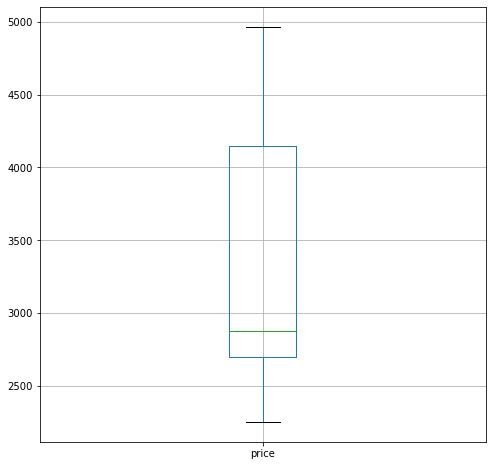

In [28]:
### you can create a box plot for any numerical column using a single line of code.
box=df.boxplot(figsize=(8,8))

In [29]:
#No outlier in the dataset

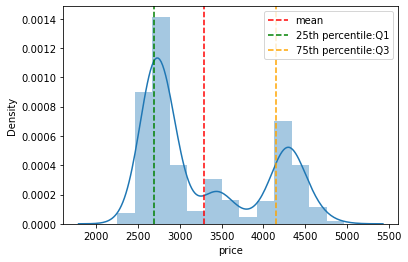

In [30]:
#Displot To check Normality in the data
sns.distplot(df['price'])
plt.axvline(x=np.mean(df['price']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['price'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['price'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

<Figure size 2160x576 with 0 Axes>

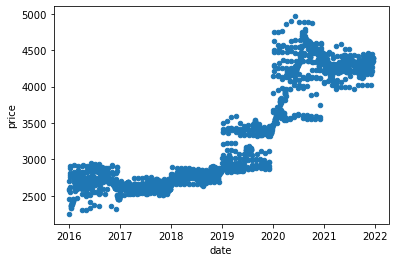

In [31]:
#Scatter plot
plt.figure(figsize=(30,8))
df.plot(kind='scatter',x='date',y='price')
plt.show()

In [32]:
#Observation : From above visualization we can see that there is variation in the gold price .

In [33]:
#Let visualizing the sum of all sales each year. We can do that using group of “Price” and “Date” and group by “Year”.

In [34]:
df=df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
df_year = df[['price','year']].groupby(by='year').sum().reset_index()

df_year

year         price
0  2016  9.847648e+05
1  2017  9.587369e+05
2  2018  1.015407e+06
3  2019  1.149827e+06
4  2020  1.543195e+06
5  2021  1.514739e+06

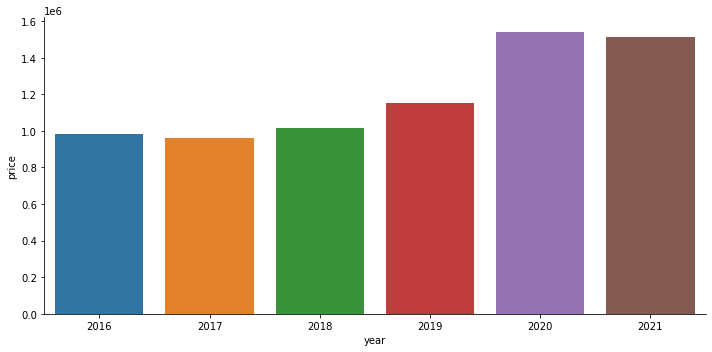

In [35]:
sns.catplot(x='year',y='price',data=df_year,kind='bar',aspect=2)

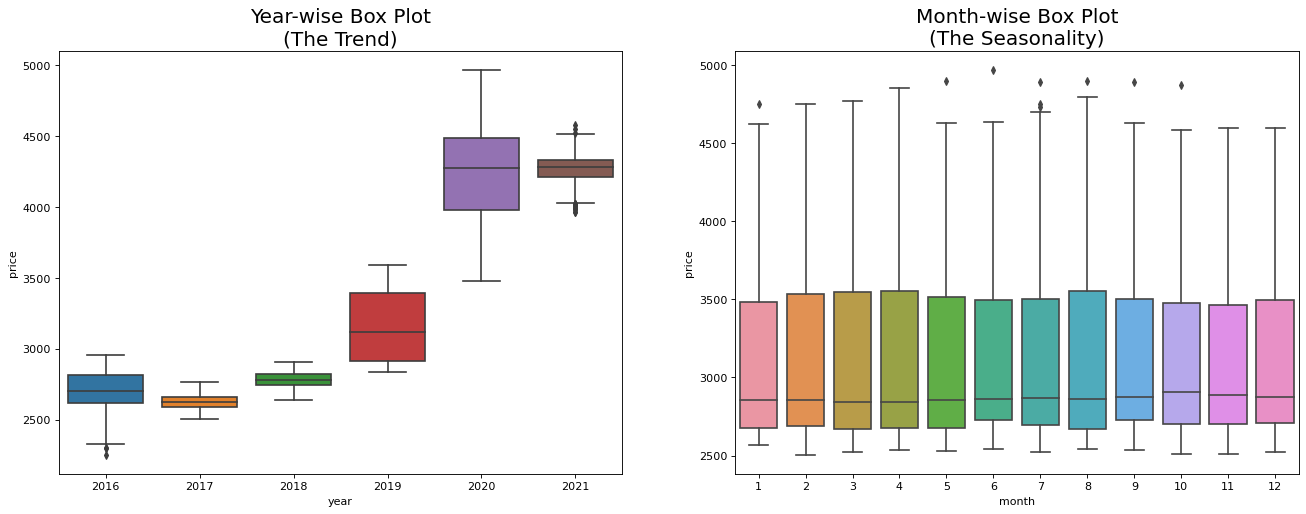

In [36]:
#Monthly & Yearly Gold Price (TREND & SEASONALITY)
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='price', data=df, ax=axes[0])
sns.boxplot(x='month', y='price', data=df.loc[~df.year.isin([2016, 2021]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

[Text(0.5, 1.0, 'Weekly Gold Price')]

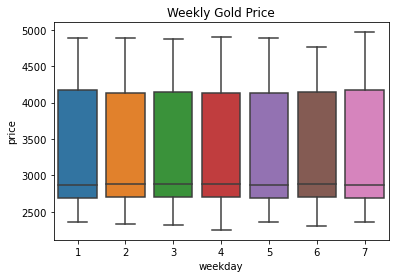

In [37]:
#Weekly Gold Price
plot = sns.boxplot(x='weekday', y='price', data=df)
plot.set(title='Weekly Gold Price')


In [38]:
#Correlation Plot - EDA

#Finally, to find the correlation among the variables, we can make use of the correlation function.
#This will give you a fair idea of the correlation strength between different variables.

In [39]:
df.corr()

price      year     month       day   weekday
price    1.000000  0.880318  0.075041  0.023311 -0.000928
year     0.880318  1.000000 -0.010417 -0.008684 -0.000735
month    0.075041 -0.010417  1.000000  0.001173  0.002167
day      0.023311 -0.008684  0.001173  1.000000 -0.002243
weekday -0.000928 -0.000735  0.002167 -0.002243  1.000000

In [40]:
#This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated

<function matplotlib.pyplot.show(close=None, block=None)>

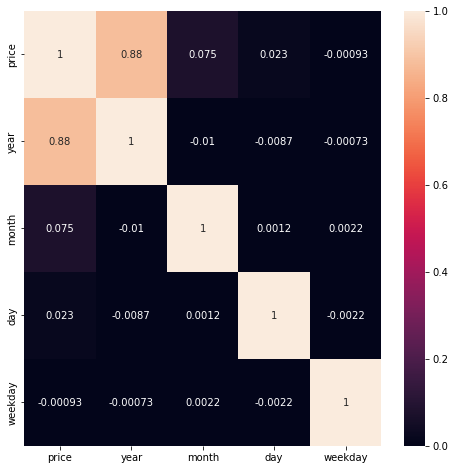

In [41]:
#Correlation plot

corr_matrix = df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(data= corr_matrix,annot=True,vmin=0)
plt.show

In [42]:
#Feature Enggineering

In [43]:
# Making thr date as DateTime index for the DataFrame

df1 = df.copy()
df1.set_index('date',inplace=True)
df1.index.year

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=2182)

In [44]:
visual = df1.copy()
visual.reset_index(inplace=True)
visual['date'] = pd.to_datetime(visual['date'])
visual['year'] = visual['date'].dt.year
visual['month'] = visual['date'].dt.month
visual['week'] = visual['date'].dt.isocalendar().week
visual['quarter'] = visual['date'].dt.quarter
visual['day_of_week'] = visual['date'].dt.day_name()
visual.drop('date', axis =1 , inplace= True)
visual.head(10)

price  year  month  day  weekday  week  quarter day_of_week
0  2252.60  2016      1    1        4    53        1      Friday
1  2454.50  2016      1    2        5    53        1    Saturday
2  2708.10  2016      1    3        6    53        1      Sunday
3  2577.80  2016      1    4        7     1        1      Monday
4  2597.75  2016      1    5        1     1        1     Tuesday
5  2617.70  2016      1    6        2     1        1   Wednesday
6  2903.80  2016      1    7        3     1        1    Thursday
7  2887.80  2016      1    8        4     1        1      Friday
8  2813.80  2016      1    9        5     1        1    Saturday
9  2786.80  2016      1   10        6     1        1      Sunday

In [45]:
visual.year.unique

<bound method Series.unique of 0       2016
1       2016
2       2016
3       2016
4       2016
        ... 
2177    2021
2178    2021
2179    2021
2180    2021
2181    2021
Name: year, Length: 2182, dtype: int64>

In [46]:
#Average Price of Gold for each year

In [47]:
df_2016 = visual[visual['year']==2016][['month','price']]
df_2016 = df_2016.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2016'})
df_2017 = visual[visual['year']==2017][['month','price']]
df_2017 = df_2017.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2017'})
df_2018 = visual[visual['year']==2018][['month','price']]
df_2018 = df_2018.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2018'})
df_2019 = visual[visual['year']==2019][['month','price']]
df_2019 = df_2019.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2019'})
df_2020 = visual[visual['year']==2020][['month','price']]
df_2020 = df_2020.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2020'})
df_2021 = visual[visual['year']==2021][['month','price']]
df_2021 = df_2021.groupby('month').agg({"price" : "mean"}).reset_index().rename(columns={'price':'2021'})

df_year = df_2016.merge(df_2017,on='month').merge(df_2018,on='month').merge(df_2019,on='month').merge(df_2020,on='month')\
.merge(df_2021,on='month')

In [48]:
import plotly.graph_objects as go

# top levels
top_labels = ['2016', '2017', '2018', '2019', '2020','2021']

colors = ['rgb(6, 19, 14)', 'rgb(18, 58, 43)',
          'rgb(31, 97, 71)', 'rgb(43, 136, 100)',
          'rgb(55, 174, 129)','rgb(81, 200, 154)',
          'rgb(119, 212, 176)','rgb(158, 224, 199)']

# X axis value 
df_year = df_year[['2016', '2017', '2018', '2019', '2020','2021']].replace(np.nan,0)
x_data = df_year.values

# y axis value (Month)
df_2016['month'] =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
y_data = df_2016['month'].tolist()

fig = go.Figure()
for i in range(0, len(x_data[0])):
    for xd, yd in zip(x_data, y_data):
        fig.add_trace(go.Bar(
            x=[xd[i]], y=[yd],
            orientation='h',
            marker=dict(
                color=colors[i],
                line=dict(color='rgb(248, 248, 249)', width=1)
            )
        ))

In [49]:
fig.update_layout(title='Avg Price for each Year',
    xaxis=dict(showgrid=False, 
               zeroline=False, domain=[0.15, 1]),
    yaxis=dict(showgrid=False, showline=False,
               showticklabels=False, zeroline=False),
    barmode='stack', 
    template="plotly_white",
    margin=dict(l=0, r=50, t=100, b=10),
    showlegend=False, 
)

annotations = []
for yd, xd in zip(y_data, x_data):
    # labeling the y-axis
    annotations.append(dict(xref='paper', yref='y',
                            x=0.14, y=yd,
                            xanchor='right',
                            text=str(yd),
                            font=dict(family='Arial', size=14,
                                      color='rgb(67, 67, 67)'),
                            showarrow=False, align='right'))
    # labeling the first Likert scale (on the top)
    if yd == y_data[-1]:
        annotations.append(dict(xref='x', yref='paper',
                                x=xd[0] / 2, y=1.1,
                                text=top_labels[0],
                                font=dict(family='Arial', size=14,
                                          color='rgb(67, 67, 67)'),
                          showarrow=False))
    space = xd[0]  
    for i in range(1, len(xd)):
            # labeling the Likert scale
            if yd == y_data[-1]:
                annotations.append(dict(xref='x', yref='paper',
                                        x=space + (xd[i]/2), y=1.1,
                                        text=top_labels[i],
                                        font=dict(family='Arial', size=14,
                                                  color='rgb(67, 67, 67)'),
                                        showarrow=False))
            space += xd[i]
fig.update_layout(
    annotations=annotations)
fig.show()

In [50]:
#Observation:

#Highest prices of gold are in Auguest to December and the decreased in January to March
#Price are increasing gradually from 2019 to 2021
#Charts for visualise the Month,Quarter and week wise Price of Gold

In [51]:
# data

import calendar


df_m_sa = visual.groupby('month').agg({"price" : "mean"}).reset_index()
df_m_sa['price'] = round(df_m_sa['price'],2)
df_m_sa['month_text'] = df_m_sa['month'].apply(lambda x: calendar.month_abbr[x])
df_m_sa['text'] = df_m_sa['month_text'] + ' - ' + df_m_sa['price'].astype(str) 

df_w_sa = visual.groupby('week').agg({"price" : "mean"}).reset_index() 
df_q_sa = visual.groupby('quarter').agg({"price" : "mean"}).reset_index() 
# chart color
df_m_sa['color'] = '#496595'
df_m_sa['color'][:-1] = '#c6ccd8'
df_w_sa['color'] = '#c6ccd8'

In [52]:
from plotly.subplots import make_subplots


fig = make_subplots(rows=2, cols=2, vertical_spacing=0.1,
                    row_heights=[0.7, 0.3], 
                    specs=[[{"type": "bar"}, {"type": "pie"}],
                           [{"colspan": 2}, None]],
                    column_widths=[0.7, 0.3],
                    subplot_titles=("Month wise Avg Price Analysis", "Quarter wise Avg Price Analysis", 
                                    "Week wise Avg Price Analysis"))

fig.add_trace(go.Bar(x=df_m_sa['price'], y=df_m_sa['month'], marker=dict(color= df_m_sa['color']),
                     text=df_m_sa['text'],textposition='auto',
                     name='Month', orientation='h'), 
                     row=1, col=1)
fig.add_trace(go.Pie(values=df_q_sa['price'], labels=df_q_sa['quarter'], name='Quarter',
                     marker=dict(colors=['#334668','#496595','#6D83AA','#91A2BF','#C8D0DF']), hole=0.7,
                     hoverinfo='label+percent+value', textinfo='label+percent'), 
                     row=1, col=2)
fig.add_trace(go.Scatter(x=df_w_sa['week'], y=df_w_sa['price'], mode='lines+markers', fill='tozeroy', fillcolor='#c6ccd8',
                     marker=dict(color= '#496595'), name='Week'), 
                     row=2, col=1)

# styling
fig.update_yaxes(visible=False, row=1, col=1)
fig.update_xaxes(visible=False, row=1, col=1)
fig.update_xaxes(tickmode = 'array', tickvals=df_w_sa.week, ticktext=[i for i in range(1,53)], 
                 row=2, col=1)
fig.update_yaxes(visible=False, row=2, col=1)
fig.update_layout(height=750, bargap=0.15,
                  margin=dict(b=0,r=20,l=20), 
                  title_text="Average Price Analysis",
                  template="plotly_white",
                  title_font=dict(size=25, color='#8a8d93', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                  showlegend=False)
fig.show()

In [53]:
#Observation:
#As we saw in the above chart there is an upward trend in price of Gold over the time. Although there are ups and downs at every point in time, generally we can observe that the trend increases. Also we can notice how the ups and downs seem to be a bit regular, it means we might be observing a seasonal pattern here too. Let’s take a closer look by observing some year’s data:
#Highest price average price is on Tuesday.
#Auguest Month has the Highest price.

In [54]:
#4) Model Building

In [55]:
#Decomposition of Time series
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

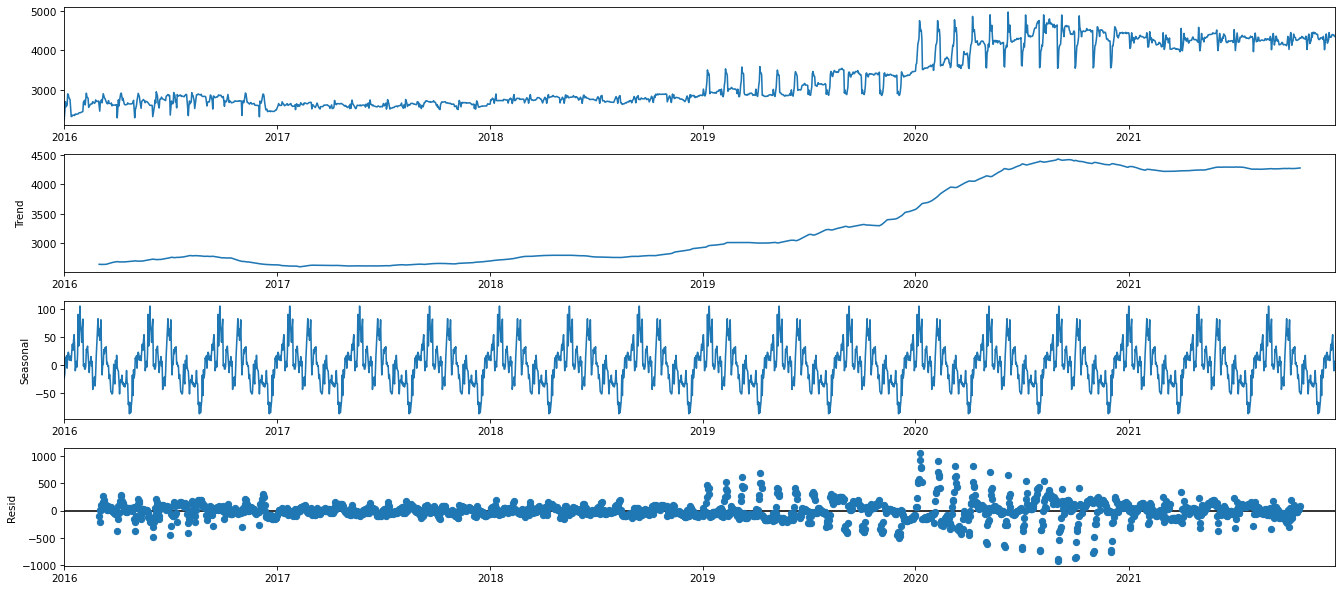

In [56]:
plt.rcParams.update({'figure.figsize':(18,8), 'figure.dpi':75})
result = seasonal_decompose(df_eda, model='additive', period=120)
result.plot()
plt.show()

In [57]:
#Trend - Slow moving changes in a time series, Responisble for making series gradually increase or decrease over time.

#Seasonality - Seasonal Paterns in the series. The cycles occur repeatedly over a fixed period of time.

#Residuals - The behaviour of the time series that cannot be explained by the trend and seasonality components. Also called random errors/white noise.

In [58]:
####Plotting Rolling Statistics

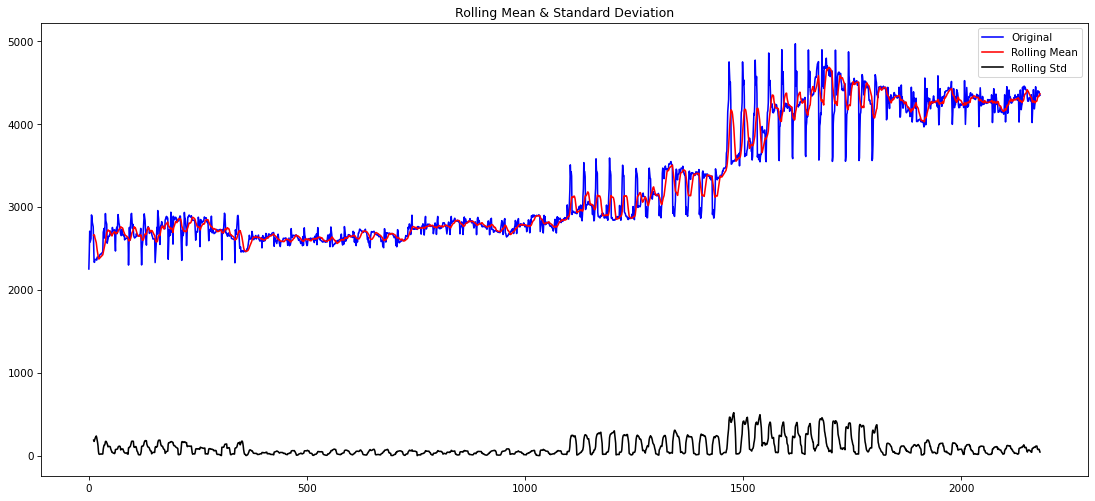

In [59]:
rolmean = df['price'].rolling(12).mean()
rolstd = df['price'].rolling(12).std()

#Plot rolling statistics:

orig = plt.plot(df['price'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [60]:
#We observe that the rolling mean and Standard deviation are not constant with respect to time (increasing trend)The time series is hence not stationary
#Testing for Stationarity

#Time Series is Stationary if we have constant mean, constant variance and No Trend and No Seasonality

#But in our data set we can see uprising trend and also seasonality is present, So we can say that our data is Non-Stationary.

In [61]:
#ADF(Augmented Dickey-Fuller) Test

In [62]:
from statsmodels.tsa.stattools import adfuller

In [63]:
test_result=adfuller(df['price'])

In [64]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print(" reject the null hypothesis.Data is stationasry")
    else:
        print(" accept null hypothesis. Data is Non-Stationary ")


In [65]:
adfuller_test(df['price'])

ADF Test Statistic : -0.30990365704574374
p-value : 0.9240899189086004
#Lags Used : 26
Number of Observations Used : 2155
 accept null hypothesis. Data is Non-Stationary 


In [66]:
df['price First Difference'] = df['price'] - df['price'].shift(1)

In [67]:
df['Seasonal First Difference']=df['price']-df['price'].shift(30)

In [68]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -10.012615740227204
p-value : 1.7623278407654842e-17
#Lags Used : 7
Number of Observations Used : 2144
 reject the null hypothesis.Data is stationasry


<AxesSubplot:>

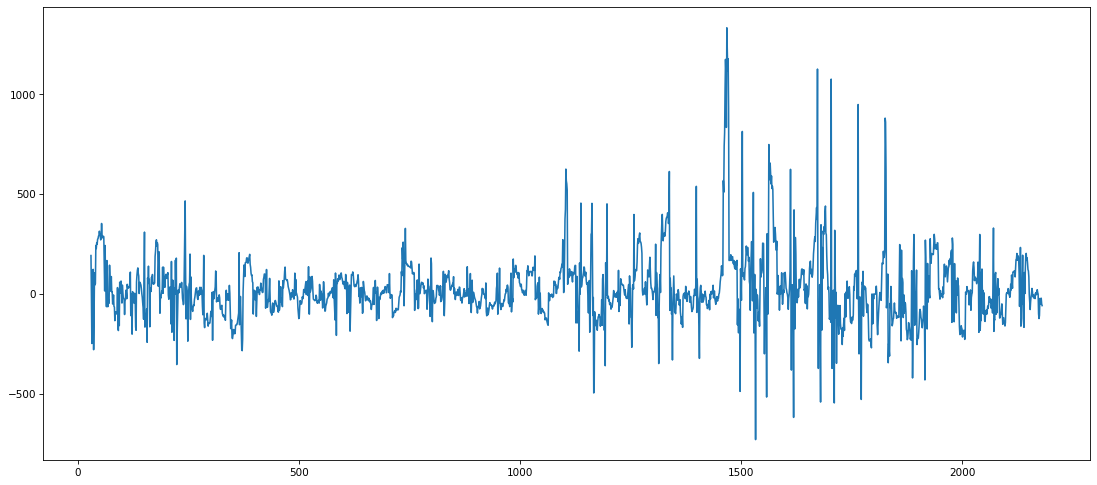

In [69]:
df['Seasonal First Difference'].plot()

In [70]:
## Again test dickey fuller test for first differencing
adfuller_test(df['price First Difference'].dropna())

ADF Test Statistic : -21.664542127244424
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 2154
 reject the null hypothesis.Data is stationasry


In [71]:
#Our Data is now stationary

In [72]:
###ACF and PACF plots

In [73]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

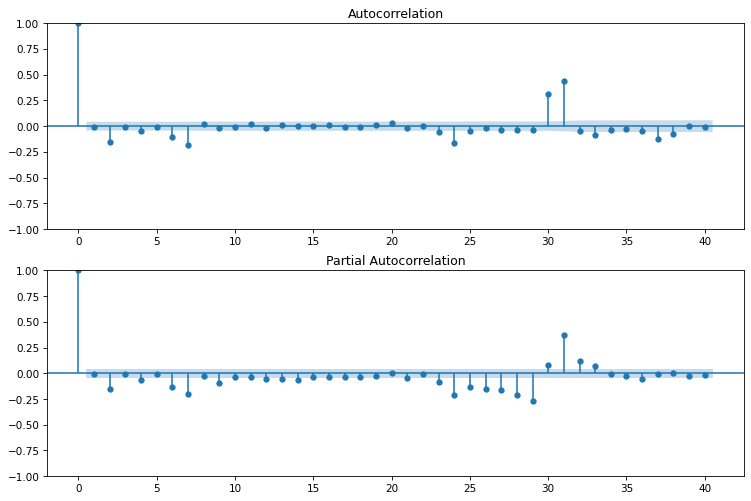

In [74]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['price First Difference'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['price First Difference'].iloc[1:],lags=40,ax=ax2)

In [75]:
###Spliting Data

In [76]:
df = pd.date_range(start='1/1/2016', end='21/12/2021', freq='M')
df

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31',
               '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
      

In [77]:
df = pd.read_csv("Gold_data.csv")
df

date    price
0     2016-01-01  2252.60
1     2016-01-02  2454.50
2     2016-01-03  2708.10
3     2016-01-04  2577.80
4     2016-01-05  2597.75
...          ...      ...
2177  2021-12-17  4394.40
2178  2021-12-18  4389.50
2179  2021-12-19  4389.50
2180  2021-12-20  4354.10
2181  2021-12-21  4346.50

[2182 rows x 2 columns]

In [78]:
df['date'] = pd.to_datetime(df['date'])
df

date    price
0    2016-01-01  2252.60
1    2016-01-02  2454.50
2    2016-01-03  2708.10
3    2016-01-04  2577.80
4    2016-01-05  2597.75
...         ...      ...
2177 2021-12-17  4394.40
2178 2021-12-18  4389.50
2179 2021-12-19  4389.50
2180 2021-12-20  4354.10
2181 2021-12-21  4346.50

[2182 rows x 2 columns]

In [79]:
df = df.set_index('date')

In [80]:
train    =   df[df.index.year <= 2020] 
test     =   df[df.index.year > 2020]

In [81]:
print(train.shape)
print(test.shape)

(1827, 1)
(355, 1)


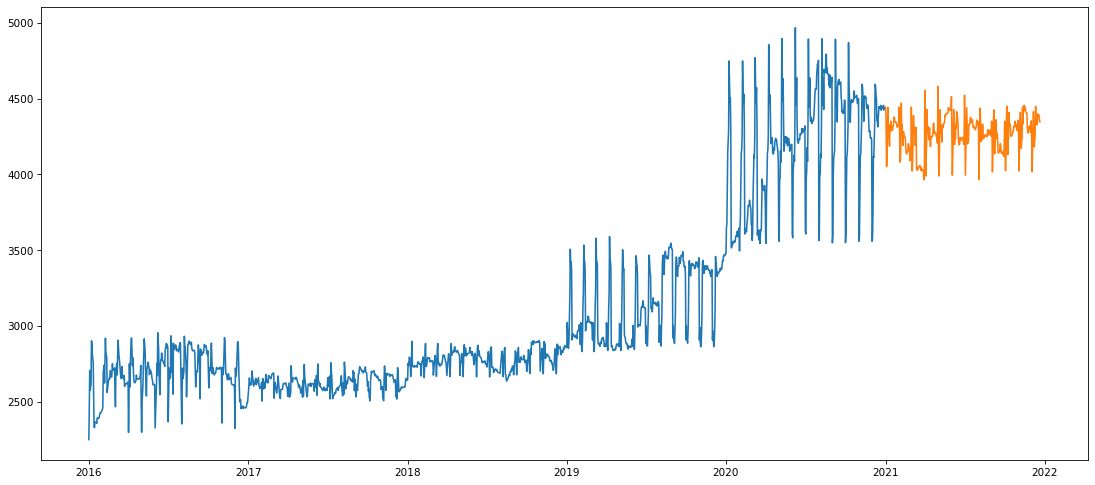

In [82]:
plt.plot(train)
plt.plot(test)
plt.show()

In [83]:
#ARIMA MODEL

In [84]:
!pip install pmdarima

In [85]:
# Figure out order for ARIMA Model
from pmdarima import auto_arima

In [86]:
stepwise_fit = auto_arima(train, trace = True, suppress_warnings=True, seasonal=False)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22374.613, Time=2.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22546.376, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22548.368, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22548.362, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22544.571, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=22516.950, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=22518.306, Time=0.41 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=22383.062, Time=1.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=22381.946, Time=2.37 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22538.332, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=22380.067, Time=1.84 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=22520.203, Time=0.68 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=22353.708, Time=5.68 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=22336.771, Time=4.29 sec
 ARIMA(4,1,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1827
Model:               SARIMAX(4, 1, 2)   Log Likelihood              -11160.344
Date:                Tue, 23 May 2023   AIC                          22336.688
Time:                        08:32:18   BIC                          22380.767
Sample:                    01-01-2016   HQIC                         22352.948
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1770      0.103      1.725      0.085      -0.024       0.378
ar.L1          1.3012      0.099     13.132      0.000       1.107       1.495
ar.L2         -0.5295      0.088     -6.006      0.000      -0.702      -0.357
ar.L3          0.2125      0.034      6.304      0.000       0.146       0.279
ar.L4         -0.1723      0.021     -8.319      0.000      -0.213      -0.132
ma.L1         -1.3977      0.105    -13.316      0.000      -1.603      -1.192
ma.L2          0.4239      0.102      4.141      0.000       0.223       0.625
sigma2      1.209e+04    138.284     87.440      0.000    1.18e+04    1.24e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             46940.30
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                            -1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(train['price'],order = (4,1,2))
result = model_arima.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                 1827
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -11163.532
Date:                Tue, 23 May 2023   AIC                          22341.065
Time:                        08:32:20   BIC                          22379.634
Sample:                    01-01-2016   HQIC                         22355.292
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3406      0.094     14.249      0.000       1.156       1.525
ar.L2         -0.5569      0.084     -6.669      0.000      -0.721      -0.393
ar.L3          0.2027      0.033      6.180      0.000       0.138       0.267
ar.L4         -0.1588      0.020     -7.792      0.000      -0.199      -0.119
ma.L1         -1.4302      0.101    -14.215      0.000      -1.627      -1.233
ma.L2          0.4574      0.097      4.723      0.000       0.268       0.647
sigma2      1.195e+04    133.199     89.734      0.000    1.17e+04    1.22e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):             48209.96
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               4.66   Skew:                            -1.81
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [88]:
test_pred = pd.DataFrame(result.predict(len(train),len(train)+354,type='levels'))
test_pred.index = test.index
test_pred

predicted_mean
date                      
2021-01-01     4420.519139
2021-01-02     4406.322665
2021-01-03     4395.786919
2021-01-04     4385.776031
2021-01-05     4378.501976
...                    ...
2021-12-17     4383.767005
2021-12-18     4383.767005
2021-12-19     4383.767005
2021-12-20     4383.767005
2021-12-21     4383.767005

[355 rows x 1 columns]

In [89]:
start = len(train)
end=len(train)+len(test)-1
test_pred = pd.DataFrame(result.predict(start = start, end=end, type='levels'))
test_pred_index = test.index
test_pred
test_pred.index = df.index[start:end+1]   # To print ouput in date format
print(test_pred)

            predicted_mean
date                      
2021-01-01     4420.519139
2021-01-02     4406.322665
2021-01-03     4395.786919
2021-01-04     4385.776031
2021-01-05     4378.501976
...                    ...
2021-12-17     4383.767005
2021-12-18     4383.767005
2021-12-19     4383.767005
2021-12-20     4383.767005
2021-12-21     4383.767005

[355 rows x 1 columns]


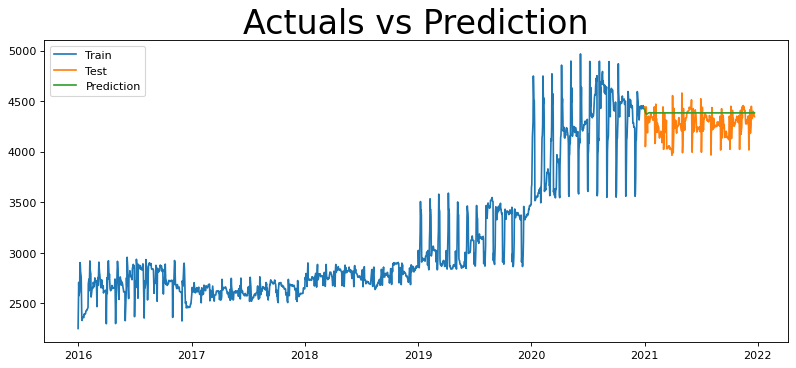

In [90]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction', size=30)
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error
from math import sqrt

In [92]:
mse = mean_squared_error(test_pred['predicted_mean'],test['price'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred.predicted_mean,test.price)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred.predicted_mean,test.price)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  26596.44340021529
Root Mean Squared Error (RMSE) =  163.08
Mean Absolute Error (MAE)  =  130.43470071774885
Mean Absolute Percentage Error (MAPE)  =  0.029753948678186884


In [93]:
#Forecast for the 30 Days

In [94]:
forecast = result.predict(len(df), len(df)+31, type = 'levels')
forecast
index_future_dates = pd.date_range(start='2021-12-21', end = '2022-01-21')
forecast.index=index_future_dates
print(forecast)

2021-12-21    4383.767005
2021-12-22    4383.767005
2021-12-23    4383.767005
2021-12-24    4383.767005
2021-12-25    4383.767005
2021-12-26    4383.767005
2021-12-27    4383.767005
2021-12-28    4383.767005
2021-12-29    4383.767005
2021-12-30    4383.767005
2021-12-31    4383.767005
2022-01-01    4383.767005
2022-01-02    4383.767005
2022-01-03    4383.767005
2022-01-04    4383.767005
2022-01-05    4383.767005
2022-01-06    4383.767005
2022-01-07    4383.767005
2022-01-08    4383.767005
2022-01-09    4383.767005
2022-01-10    4383.767005
2022-01-11    4383.767005
2022-01-12    4383.767005
2022-01-13    4383.767005
2022-01-14    4383.767005
2022-01-15    4383.767005
2022-01-16    4383.767005
2022-01-17    4383.767005
2022-01-18    4383.767005
2022-01-19    4383.767005
2022-01-20    4383.767005
2022-01-21    4383.767005
Freq: D, Name: predicted_mean, dtype: float64


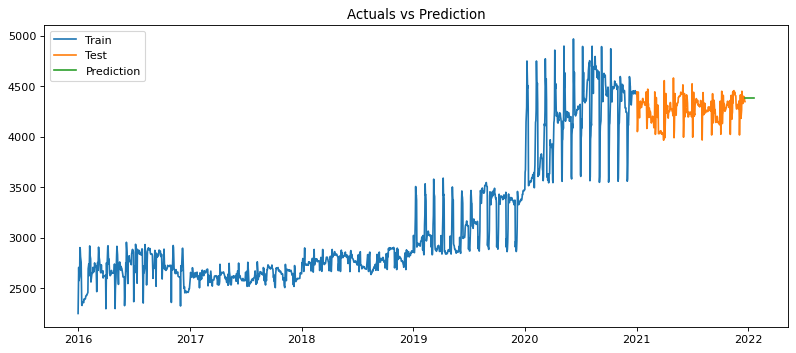

In [95]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

<AxesSubplot:>

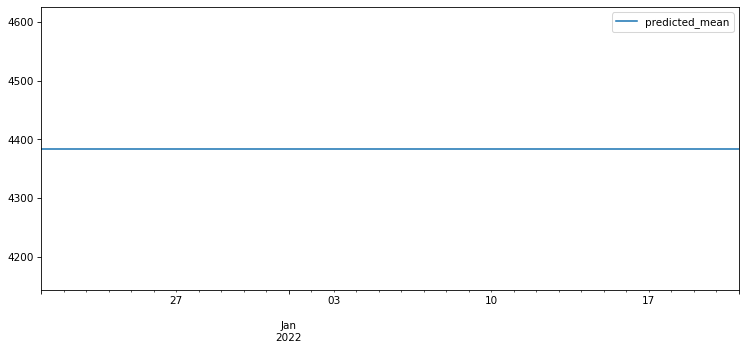

In [96]:
forecast.plot(figsize=(12,5), legend=True)

In [97]:
#SARIMA

In [98]:
import itertools
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 22) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 22)
SARIMAX: (0, 1, 1) x (0, 1, 2, 22)
SARIMAX: (0, 1, 2) x (1, 1, 0, 22)
SARIMAX: (0, 1, 2) x (1, 1, 1, 22)


In [99]:
model_SA = sm.tsa.SARIMAX(train['price'], order=(0,1,2), seasonal_order=(1,1,1,22))
result_SA = model_SA.fit()
result_SA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                price   No. Observations:                 1827
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 22)   Log Likelihood              -11169.172
Date:                              Tue, 23 May 2023   AIC                          22348.343
Time:                                      08:32:34   BIC                          22375.832
Sample:                                  01-01-2016   HQIC                         22358.489
                                       - 12-31-2020                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0070      0.017      0.414      0.679      -0.026       0.040
ma.L2         -0.1513      0.019     -7.943      0.000      -0.189      -0.114
ar.S.L22      -0.0054      0.026     -0.213      0.832      -0.056       0.045
ma.S.L22      -0.9993      0.269     -3.721      0.000      -1.526      -0.473
sigma2      1.325e+04   3485.984      3.801      0.000    6417.697    2.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             44803.11
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               4.81   Skew:                            -1.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
test_pred_SA = pd.DataFrame(result_SA.predict(len(train),len(train)+354,type='levels'))
test_pred_SA.index = test.index
test_pred_SA

predicted_mean
date                      
2021-01-01     4438.091602
2021-01-02     4438.079571
2021-01-03     4436.990181
2021-01-04     4460.085838
2021-01-05     4457.025219
...                    ...
2021-12-17     4840.693717
2021-12-18     4856.702172
2021-12-19     4855.184672
2021-12-20     4852.860285
2021-12-21     4851.010201

[355 rows x 1 columns]

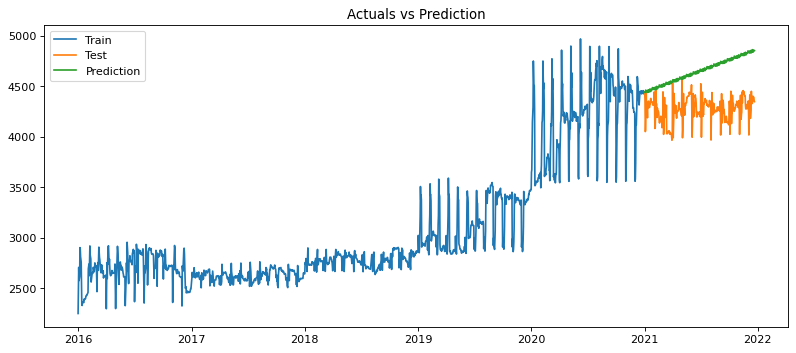

In [101]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'], label='Test')
plt.plot(test_pred_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [102]:
mse = mean_squared_error(test_pred_SA['predicted_mean'],test['price'])
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test_pred_SA.predicted_mean,test.price)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test_pred_SA.predicted_mean,test.price)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  168824.35503512563
Root Mean Squared Error (RMSE) =  410.88
Mean Absolute Error (MAE)  =  382.46776925196707
Mean Absolute Percentage Error (MAPE)  =  0.08175803130098569


In [103]:
#Forecast for next 30 Days

In [104]:
forecast_SA = result_SA.predict(len(df), len(df)+31, type = 'levels')
forecast_SA
index_future_dates = pd.date_range(start='2021-12-21', end = '2022-01-21')
forecast_SA.index=index_future_dates
print(forecast_SA)

2021-12-21    4873.981001
2021-12-22    4870.712575
2021-12-23    4868.887769
2021-12-24    4860.417819
2021-12-25    4855.642675
2021-12-26    4870.977336
2021-12-27    4870.199364
2021-12-28    4853.311680
2021-12-29    4869.014835
2021-12-30    4878.278441
2021-12-31    4876.378441
2022-01-01    4855.049286
2022-01-02    4869.126420
2022-01-03    4879.688694
2022-01-04    4886.428330
2022-01-05    4878.253475
2022-01-06    4861.001218
2022-01-07    4866.588888
2022-01-08    4882.597343
2022-01-09    4881.079842
2022-01-10    4878.755456
2022-01-11    4876.905371
2022-01-12    4899.876171
2022-01-13    4896.607746
2022-01-14    4894.782940
2022-01-15    4886.312990
2022-01-16    4881.537846
2022-01-17    4896.872507
2022-01-18    4896.094535
2022-01-19    4879.206851
2022-01-20    4894.910006
2022-01-21    4904.173611
Freq: D, Name: predicted_mean, dtype: float64


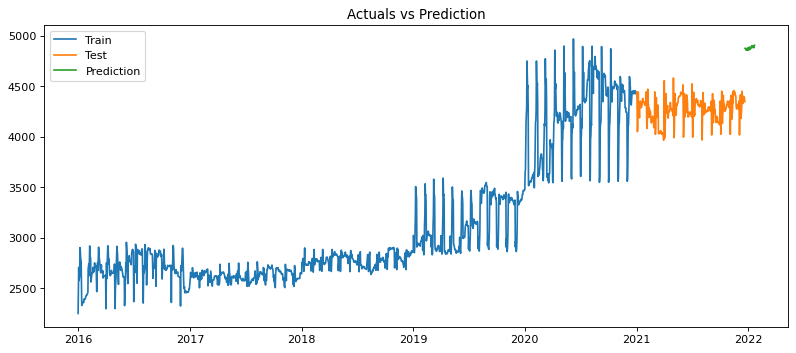

In [105]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train['price'], label = 'Train')
plt.plot(test['price'], label='Test')
plt.plot(forecast_SA, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [106]:
#Holt Method

In [107]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [108]:
'''Before starting with the models, we shall first define the weight coefficient Alpha and the Time Period. We also set the DateTime frequency to a monthly level.
#### Set the value of Alpha and define m (Time Period)'''
m = 22
alpha = 1/(2*m)

<AxesSubplot:title={'center':'Holt Winters Single Exponential Smoothing'}, xlabel='date'>

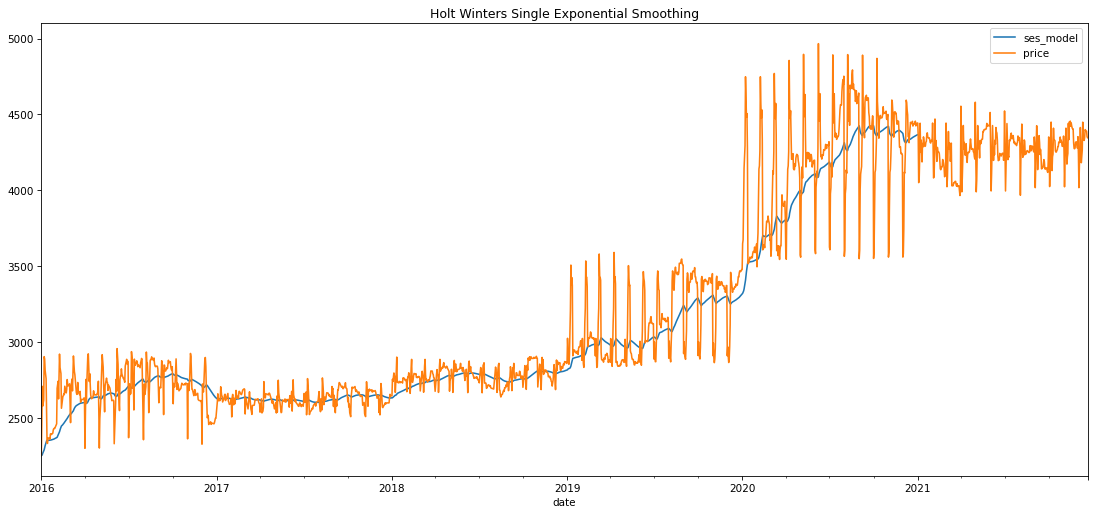

In [109]:
# Single/Simple Exponential Method
df['ses_model'] = SimpleExpSmoothing(train["price"]).fit(smoothing_level=alpha, optimized=False,use_brute=True).fittedvalues
df[['ses_model','price']].plot(title='Holt Winters Single Exponential Smoothing', legend=True)
# df2['ses_model']

In [110]:
#Type Markdown and LaTeX:  𝛼2

<AxesSubplot:title={'center':'Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend'}, xlabel='date'>

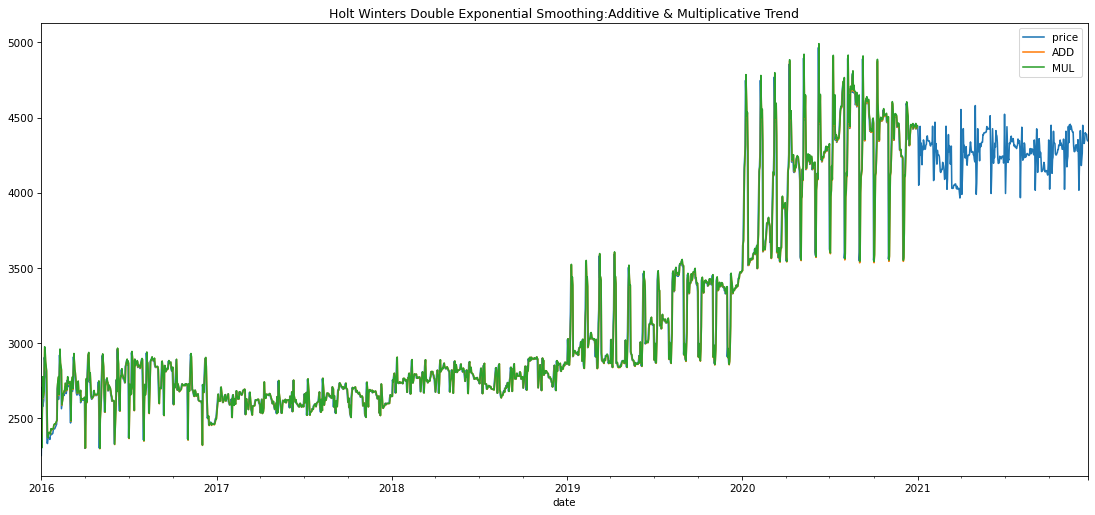

In [111]:
df['ADD'] = ExponentialSmoothing(train['price'],trend='add').fit().fittedvalues
df['MUL'] = ExponentialSmoothing(train['price'],trend='mul').fit().fittedvalues
df[['price','ADD','MUL']].plot(title='Holt Winters Double Exponential Smoothing:Additive & Multiplicative Trend')

In [112]:
#Type Markdown and LaTeX:  𝛼2
 
#Type Markdown and LaTeX: 𝛼2

In [113]:
# Fit the model tend='mul', season='mul'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=11).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

date
2021-01-01    4447.833381
2021-01-02    4458.430020
2021-01-03    4475.181463
2021-01-04    4478.349195
2021-01-05    4488.753923
                 ...     
2021-12-17    6875.341945
2021-12-18    6869.331642
2021-12-19    6881.007770
2021-12-20    6897.401270
2021-12-21    6923.316542
Length: 355, dtype: float64


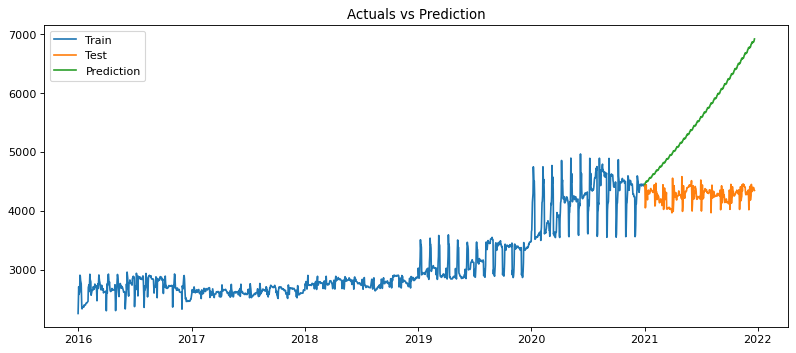

In [114]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [115]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  2258164.9069185713
Root Mean Squared Error (RMSE) =  1502.72
Mean Absolute Error (MAE)  =  1331.153263800774
Mean Absolute Percentage Error (MAPE)  =  0.3120462638051673


In [116]:
# Fit the model tend='add', season='mul'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]  

 # To print ouput in date format
print(test_predictions)

date
2021-01-01    4442.705159
2021-01-02    4427.321575
2021-01-03    4420.697153
2021-01-04    4426.102048
2021-01-05    4438.051506
                 ...     
2021-12-17    5205.541509
2021-12-18    5211.505294
2021-12-19    5225.173800
2021-12-20    5242.168806
2021-12-21    5226.425112
Length: 355, dtype: float64


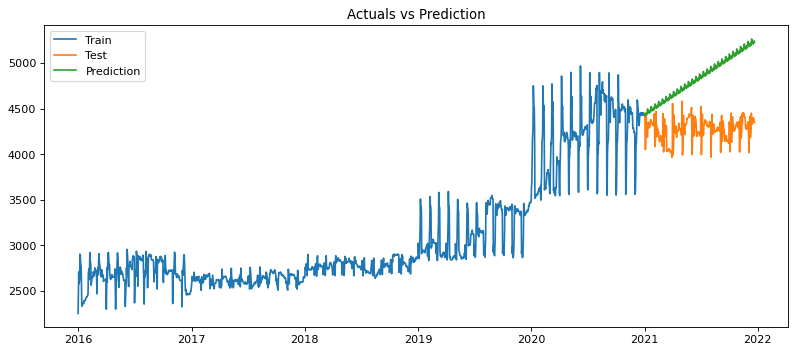

In [117]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [118]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  383210.878690094
Root Mean Squared Error (RMSE) =  619.04
Mean Absolute Error (MAE)  =  570.7179802098942
Mean Absolute Percentage Error (MAPE)  =  0.1342967997015436


In [119]:
# Fit the model tend='mul', season='add'
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='add',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

date
2021-01-01    4449.908118
2021-01-02    4447.786664
2021-01-03    4450.618618
2021-01-04    4458.924778
2021-01-05    4471.896586
                 ...     
2021-12-17    6810.362274
2021-12-18    6821.544869
2021-12-19    6837.396619
2021-12-20    6856.336129
2021-12-21    6852.321423
Length: 355, dtype: float64


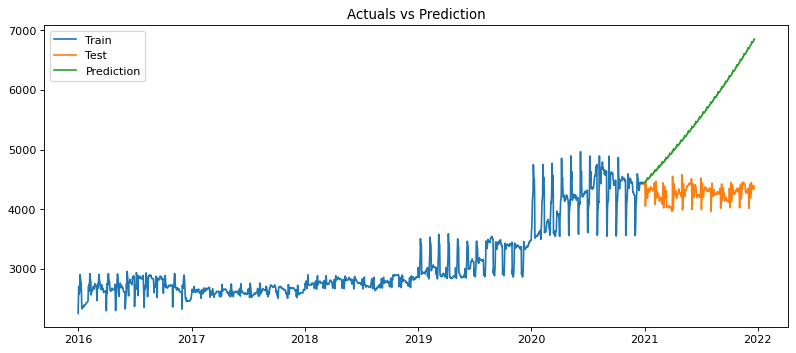

In [120]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [121]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  2160151.2111240537
Root Mean Squared Error (RMSE) =  1469.75
Mean Absolute Error (MAE)  =  1301.7013901971093
Mean Absolute Percentage Error (MAPE)  =  0.30515530568686083


In [122]:
# Fit the model tend='add', season='add'
fitted_model = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=10).fit()
test_predictions = fitted_model.forecast(355)
test_predictions.index = df['price'].index[start:end+1]   # To print ouput in date format
print(test_predictions)

date
2021-01-01    4475.085946
2021-01-02    4489.098795
2021-01-03    4490.484618
2021-01-04    4483.383997
2021-01-05    4478.088803
                 ...     
2021-12-17    5468.830651
2021-12-18    5482.843499
2021-12-19    5484.229323
2021-12-20    5477.128701
2021-12-21    5471.833507
Length: 355, dtype: float64


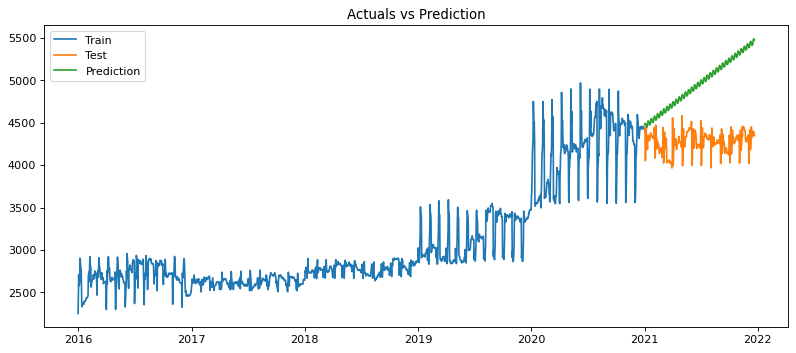

In [123]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(train, label = 'Train')
plt.plot(test, label='Test')
plt.plot(test_predictions, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [124]:
mse = mean_squared_error(test,test_predictions)
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test,test_predictions)
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test,test_predictions)
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  566000.4959788652
Root Mean Squared Error (RMSE) =  752.33
Mean Absolute Error (MAE)  =  692.9874271695998
Mean Absolute Percentage Error (MAPE)  =  0.16290023135555587


In [125]:
#EMA

In [126]:
df['EMA'] = train['price'].ewm(span=22).mean()

In [127]:
df['EMA']

date
2016-01-01    2252.600000
2016-01-02    2358.138636
2016-01-03    2485.550585
2016-01-04    2511.848585
2016-01-05    2532.287586
                 ...     
2021-12-17            NaN
2021-12-18            NaN
2021-12-19            NaN
2021-12-20            NaN
2021-12-21            NaN
Name: EMA, Length: 2182, dtype: float64

In [128]:
df['EMA_t'] = test['price'].ewm(span=22).mean()

In [129]:
df['EMA_t']

date
2016-01-01            NaN
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05            NaN
                 ...     
2021-12-17    4324.030529
2021-12-18    4329.723526
2021-12-19    4334.921481
2021-12-20    4336.589178
2021-12-21    4337.450989
Name: EMA_t, Length: 2182, dtype: float64

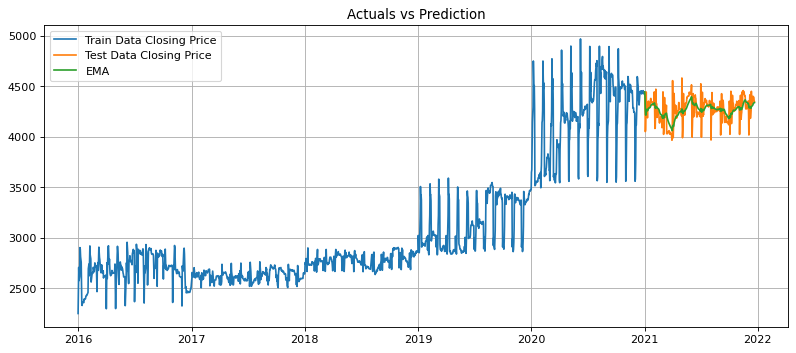

In [130]:
plt.figure(figsize=(12,5), dpi=80)
plt.grid(True)
plt.plot(train['price'],label='Train Data Closing Price')
plt.plot(test['price'],label='Test Data Closing Price')
plt.plot(df['EMA_t'],label='EMA')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.legend(loc=2)

In [131]:
df['EMA_t'].dropna()

date
2021-01-01    4443.100000
2021-01-02    4402.431818
2021-01-03    4274.229663
2021-01-04    4214.811582
2021-01-05    4213.095690
                 ...     
2021-12-17    4324.030529
2021-12-18    4329.723526
2021-12-19    4334.921481
2021-12-20    4336.589178
2021-12-21    4337.450989
Name: EMA_t, Length: 355, dtype: float64

In [132]:
mse = mean_squared_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Squared Error (MSE) = ',mse)
rmse = np.round(np.sqrt(mse),2)
print(f'Root Mean Squared Error (RMSE) = ',rmse)
mae = mean_absolute_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Absolute Error (MAE)  = ', mae)
mape = mean_absolute_percentage_error(test['price'],df['EMA_t'].dropna())
print(f'Mean Absolute Percentage Error (MAPE)  = ', mape)

Mean Squared Error (MSE) =  8401.060523832122
Root Mean Squared Error (RMSE) =  91.66
Mean Absolute Error (MAE)  =  66.8213045119925
Mean Absolute Percentage Error (MAPE)  =  0.015729767829439883
